In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lsim, TransferFunction


In [22]:
#1. Als Eingangssignal programmieren Sie in 
# *input_voltage(t)* eine Sprungfunktion 
# von 0 auf 1 Volt, wobei der Sprung innerhalb der
#  ersten 2 ms erfolgen sollte, damit die ganze 
# Sprungantwort in die 10 ms Simulationszeit passt.

def input_voltage(t):
    # Sprung von 0 auf 1 V in den ersten 2 ms (linearer Übergang)
    return np.where(t < 0.002, t / 0.002, 1.0)


In [23]:
# Parameter des RLC-Kreises
L = 10e-3      # Induktivität in H
C = 100e-9     # Kapazität in F
R = 10         # Widerstand in Ohm

# Transferfunktion des RLC-Kreises: H(s) = 1 / (LCs^2 + RCs + 1)
num = [1]
den = [L*C, R*C, 1]
system = TransferFunction(num, den)

# Zeitvektor
t = np.linspace(0, 0.01, 1000)  # 10 ms mit 1000 Punkten
u = input_voltage(t)           # Eingangssignal


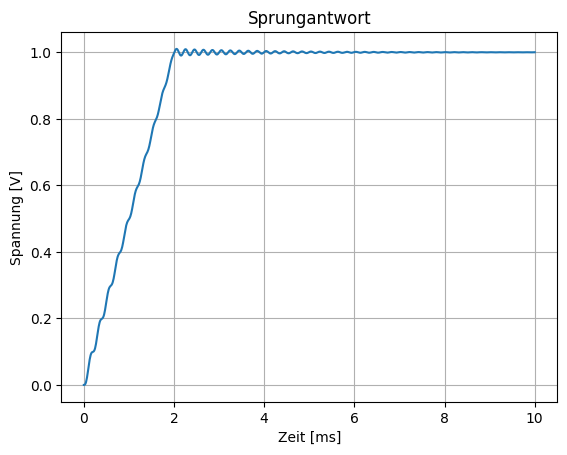

In [24]:
#2. Simulieren Sie mit dem oben angegebenen
# Code die Sprungantwort des Schwingkreises.

t_out, y_out, _ = lsim(system, U=u, T=t)
plt.plot(t_out * 1000, y_out)
plt.title("Sprungantwort")
plt.xlabel("Zeit [ms]")
plt.ylabel("Spannung [V]")
plt.grid()
plt.show()


In [25]:
#Erzeugen Sie daraus die Impulsantwort des 
# Schwingkreises durch numerische Differentation 
# (z.B. mit *numpy.gradient*). Für die 
# Weiterverarbeitung behalten Sie nur den Teil 
# der Impulsantwort bei, der nach dem Sprung 
# erfolgt.

dt = t[1] - t[0]
impulse_response = np.gradient(y_out, dt)

# Nur Impulsantwort nach dem Sprung (t >= 2ms)
start_index = np.where(t >= 0.002)[0][0]
h = impulse_response[start_index:]
t_h = t[start_index:]


In [26]:
#4. Berechnen Sie die quadrierte Impulsantwort 
# und integrieren diese dann auf, d.h. für die 
# Impulsantwort $h[n]$ berechnen Sie deren 
# Signalenergie
#$$ E = \Delta t \sum_{n=0}^{N-1} h^2[n] $$
#mit dem Abtastintervall $\Delta t$ und 
# Anzahl der Datenpunkte $N$.

E = dt * np.sum(h**2)
print(f"Signalenergie: {E:.4e}")


Signalenergie: 5.5015e+01


In [27]:
#Durch Multiplikation der Impulsantwort mit dem
# Faktor $1/\sqrt{E}$ erhalten Sie die 
# *normierte Impulsantwort*, die auf einen 
# Eingangsimpuls der Höhe 1 entstehen würde.

h_norm = h / np.sqrt(E)


In [28]:
#7. Berechnen Sie die Fouriertransformierte der 
# normierten Impulsantwort mit dem Vorfaktor 
# $1/N$, um den Frequenzgang zu erhalten.

N = len(h_norm)
H_f = np.fft.fft(h_norm) / N
f = np.fft.fftfreq(N, d=dt)

# Nur positive Frequenzen
H_f_pos = H_f[:N//2]
f_pos = f[:N//2]


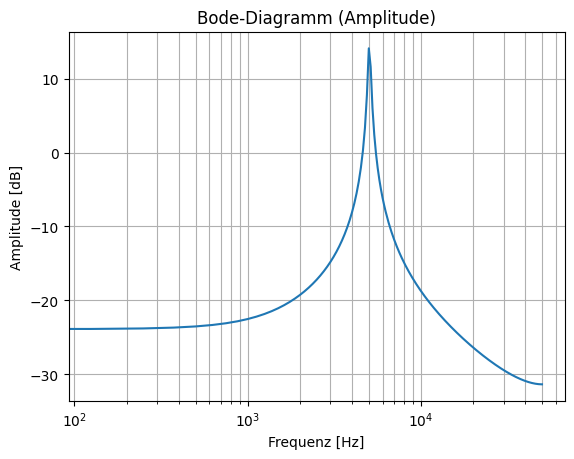

In [29]:
#8. Stellen Sie den Frequenzgang als ein 
# Bode-Diagramm dar.

plt.figure()
plt.semilogx(f_pos, 20 * np.log10(np.abs(H_f_pos)))
plt.title("Bode-Diagramm (Amplitude)")
plt.xlabel("Frequenz [Hz]")
plt.ylabel("Amplitude [dB]")
plt.grid(which="both")
plt.show()


In [30]:
#9. Bestimmen Sie die Resonanzfrequenz des 
# Schwingkreises (Maximum des Amplitudengangs). 
# Überprüfen Sie die Plausibilität anhand des 
# theoretisch vorhergesagten Wertes
# $$ f_\text{res} = \frac{1}{2\pi\sqrt{LC}} $$
# mit der Induktivität $L$ und der Kapazität $C$ 
# des Schwingkreises (s. Simulationscode).

# Gemessene Resonanzfrequenz (Maximum im Amplitudengang)
f_res_measured = f_pos[np.argmax(np.abs(H_f_pos))]
print(f"Gemessene Resonanzfrequenz: {f_res_measured:.2f} Hz")

# Theoretische Resonanzfrequenz
f_res_theoretical = 1 / (2 * np.pi * np.sqrt(L * C))
print(f"Theoretische Resonanzfrequenz: {f_res_theoretical:.2f} Hz")


Gemessene Resonanzfrequenz: 4995.00 Hz
Theoretische Resonanzfrequenz: 5032.92 Hz
